In [19]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
!pip install qiskit --quiet --no-warn-conflicts

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 32.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 47.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.3/241.3 KB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 KB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 KB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 KB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 25.6 MB/s eta 0:00:0

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit

In [61]:
# Создайте квантовую схему, действующую на квантовом регистре из трех кубитов
circ = QuantumCircuit(3)

In [66]:
# Add a H gate on qubit 0, putting this qubit in superposition.
circ.h(0)
# Add a CX (CNOT) gate on control qubit 0 and target qubit 1, putting
# the qubits in a Bell state.
circ.cx(0, 1)
# Add a CX (CNOT) gate on control qubit 0 and target qubit 2, putting
# the qubits in a GHZ state.
circ.cx(0, 2)

In [67]:
circ.draw()


┌───┐          ┌───┐          ┌───┐          
q_0: ┤ H ├──■────■──┤ H ├──■────■──┤ H ├──■────■──
     └───┘┌─┴─┐  │  └───┘┌─┴─┐  │  └───┘┌─┴─┐  │  
q_1: ─────┤ X ├──┼───────┤ X ├──┼───────┤ X ├──┼──
          └───┘┌─┴─┐     └───┘┌─┴─┐     └───┘┌─┴─┐
q_2: ──────────┤ X ├──────────┤ X ├──────────┤ X ├
               └───┘          └───┘          └───┘

In [68]:
from qiskit.quantum_info import Statevector

# Set the intial state of the simulator to the ground state using from_int
state = Statevector.from_int(0, 2**3)

# Evolve the state by the quantum circuit
state = state.evolve(circ)

#draw using latex
state.draw('latex')

<IPython.core.display.Latex object>

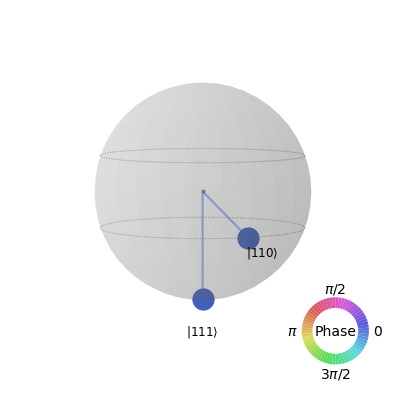

In [69]:
state.draw('qsphere')

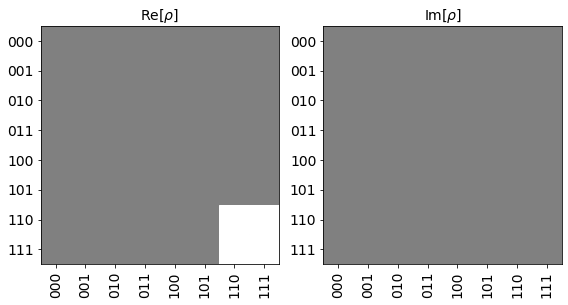

In [70]:
state.draw('hinton')

In [72]:
# Create a Quantum Circuit
meas = QuantumCircuit(3, 3)
meas.barrier(range(3))
# map the quantum measurement to the classical bits
meas.measure(range(3), range(3))

# The Qiskit circuit object supports composition.
# Here the meas has to be first and front=True (putting it before)
# as compose must put a smaller circuit into a larger one.
qc = meas.compose(circ, range(3), front=True)

#drawing the circuit
qc.draw()

┌───┐          ┌───┐          ┌───┐           ░ ┌─┐      
q_0: ┤ H ├──■────■──┤ H ├──■────■──┤ H ├──■────■───░─┤M├──────
     └───┘┌─┴─┐  │  └───┘┌─┴─┐  │  └───┘┌─┴─┐  │   ░ └╥┘┌─┐   
q_1: ─────┤ X ├──┼───────┤ X ├──┼───────┤ X ├──┼───░──╫─┤M├───
          └───┘┌─┴─┐     └───┘┌─┴─┐     └───┘┌─┴─┐ ░  ║ └╥┘┌─┐
q_2: ──────────┤ X ├──────────┤ X ├──────────┤ X ├─░──╫──╫─┤M├
               └───┘          └───┘          └───┘ ░  ║  ║ └╥┘
c: 3/═════════════════════════════════════════════════╩══╩══╩═
                                                      0  1  2

In [78]:
# Adding the transpiler to reduce the circuit to QASM instructions
# supported by the backend
from qiskit import transpile

# Use AerSimulator
from qiskit_aer import AerSimulator

backend = AerSimulator()

# First we have to transpile the quantum circuit
# to the low-level QASM instructions used by the
# backend
qc_compiled = transpile(qc, backend)

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = backend.run(qc_compiled, shots=1024)

# Grab the results from the job.
result_sim = job_sim.result()

In [79]:
counts = result_sim.get_counts(qc_compiled)
print(counts)

{'110': 535, '111': 489}


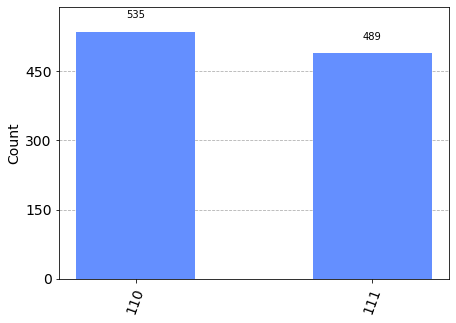

In [80]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)